# 👊 CHAPTER 7 앙상블 학습과 랜덤 포레스트


#### 🙋 Chapter Manager : 박선재  🙎 Contents Add :   권태양   

In [1]:
import matplotlib.pyplot as plt
import numpy as np
### 한글 깨짐 설정
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if( platform.system() =='Darwin' ):
    rc( 'font', family='AppleGothic' )
elif( platform.system() == 'Windows'):
    path='c:/Windows/Fonts/malgun.ttf'
    font_name= font_manager.FontProperties( fname=path ).get_name()
    rc('font',family=font_name)
else:
    print('error')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples =500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

앙상블 학습 – 여러 개의 예측기를 조화롭게 학습시켜 그 모델들의 예측 결과들을 이용한다면 더 정확한 예측 값을 구할 수 있다. 일반적으로 편향은 비슷하지만 분산은 줄어든다.

In [2]:
from IPython.display import Image
Image(url="img/ensemble.png",height=200)

## 👊7.1 투표 기반 분류기
투표 기반 분류기 – 여러 개의 예측기의 평균 또는 최빈값을 이용하여 예측을 한다.
만약 p의 정확도를 가진 분류기가 n개 있다면 이 분류기의 정확도는 ${n}/{k} p^k (1-p)^{(n-k)}$ 이다.  
  
- Law of Large Numbers에 의해서 시도 수가 많아질수록 정해진 확률에 가까워짐  

*단 이러한 가정은 모든 분류기가 독립적이어야 하고, 오차에 대해 상관관계가 없어야 한다.  
이를 위해 각기 다른 훈련 알고리즘을 사용하거나 다른 데이터로 훈련한다.  
  
투표 방식  
>직접 투표 – 가장 많이 분류된 클래스로 다수결 투표  
>간접 투표 – 개별 분류기의 예측을 평균 내어 확률이 가장 높은 클래스를 예측, 성능이 더 높음  

※ 약한 학습기 : random 추측보다 조금 더 높은 성능을 내는 분류기  
※ 강한 학습기 : 높은 정확도를 내는 분류기



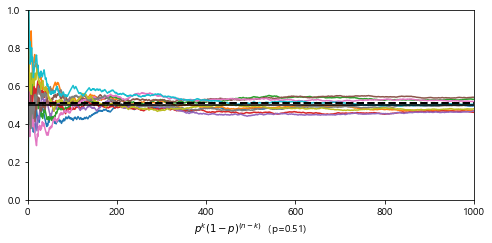

In [3]:
p = 0.51
coin_tosses = (np.random.rand(1000, 10) < p).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 1001).reshape(-1, 1)
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 1000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 1000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("$ p^k (1-p)^{(n-k)}$  (p=0.51)")
plt.axis([0, 1000, 0.0, 1.0])
plt.show()

## 👊7.2 배깅과 페이스팅  
오차에 대한 상관관계를 줄이기 위한 방법으로 훈련세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습시키는 것이다.
  
배깅(bootstrap aggregating) – 훈련세트에서 중복을 허용하여 샘플링 

- 모든 예측기가 훈련을 마치면 Ensemble은 모든 예측기의 예측을 모아서 새로운 sample에 대한 예측을 만듦. 수집함수는 전형적으로 분류일 때는 통계적 최빈값이고 회귀에 대해서는 평균을 계산.  
- 개별 예측기는 원본 훈련 set으로 훈련시키는 것보다 훨씬 크게 편향되어 있지만 수집함수를 통과하면 편향과 분산이 모두 감소함.   
- 일반적으로 Ensemble의 결과는 원본 data set으로 하나의 예측기를 훈련시킬 때와 비교해 편향은 비슷하지만 분산은 줄어듦.  
※ 발전된 Hardware 덕분에 병렬로 학습을 시킬 수가 있어 인기가 많다 
  
페이스팅 – 훈련세트에서 중복을 허용하지 않고 샘플링   


In [4]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier(bootstrap=True) #배깅
BaggingClassifier(bootstrap=False) #페이스팅

BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=1.0, max_samples=1.0,
                  n_estimators=10, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

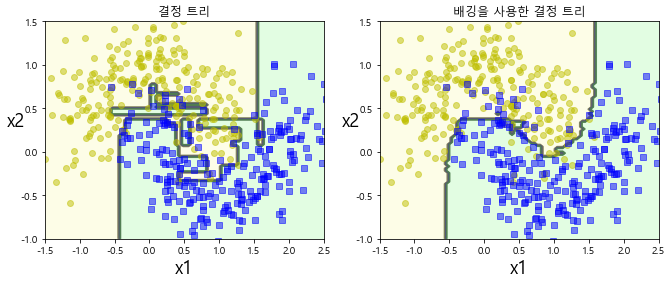

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour :
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[: ,0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'x1', fontsize=18)
    plt.ylabel(r'x2', fontsize=18, rotation=0)
plt.figure(figsize=(11,4))
plt.subplot(121)
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
plot_decision_boundary(tree_clf, X, y)
plt.title("결정 트리")
plt.subplot(122)
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100,bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(X_train, y_train)
plot_decision_boundary(bag_clf, X, y)
plt.title("배깅을 사용한 결정 트리")
plt.show()

### 👊7.2.2 oob 평가  
* Bagging을  사용하면 어떤 sample은 한 예측기를 위해 여러 번 sampling되고 어떤 것은 전혀 선택되지 않을 수 있다.  BaggingClassifier는 default값으로 중복을 허용하여 (bootstrap = True) 훈련 set의 크기만큼인 m개 sample을 선택하고 이는 평균적으로 각 예측기에 훈련 sample의 63%정도만 sampling된다는 것을 의미한다.  
* 선택되지 않은 훈련 sample의 나머지 37%를 Out-Of-Bag (oob) sample이라고 부르고 예측기마다 남겨진 37%는 모두 다르다.  
예측기가 훈련되는 동안엔 oob sample을 사용하지 않으므로 검증 set이나 교차 검증을 사용하지 않고 oob sample을 사용해 평가할 수 있다.   
* Ensemble의 평가는 각 예측기의 oob 평가를 평균하여 얻음   sklearn BaggingClassifier를 만들 때 oob_score= True로 지정하면 훈련이 끝난 후 자동으로 oob 평가를 수행한다.  
$$\lim{m\rightarrow\infty}{\left(1-\frac{1}{m}\right)^m}={1\ -\ e}^{-1}\approx0.63212 $$\*m개의 샘플에서 무작위로 추출할 경우  

이 남은 샘플을 이용하면 검증 세트나 교차 검증을 사용하지 않고 정확도를 평가할 수 있다.

In [6]:
#oob 평과 결과
bag_clf.oob_score_

0.9253333333333333

## 👊7.3 랜덤 패치와 랜덤 서브 스페이스  
BaggingClassifier는 특성 샘플링도 지원한다.  
작동방식은 max_samples, bootstrap과 동일하지만 sample이 아니고 특성에 대한 샘플링이다.
- 특성 샘플링 - 오차에 대한 상관관계를 줄이기 위하여 훈련셋의 특성을 무작위의 서브셋으로 구성한다.  
- 랜덤 패치 방식- 훈련 특성과 샘플을 모두 샘플링 하는 것   
- 랜덤 서브스페이스 방식 – 훈련 샘플을 모두 사용하고 특성은 샘플링 하는 것  

\* 이미지와 같은 매우 고차원의 data set을 다룰 때 유용함. 


## 👊7.4 랜덤 포레스트
랜덤 포레스트 – 배깅(페이스팅), 랜덤 특성 분할을 적용한 결정 트리의 앙상블  
  
엑스트라 트리 - 배깅(페이스팅), 랜덤 특성 분할,랜덤 분할(노드를 분할하는 최적의 임계값을 찾는 것이 아니라 후보 특성을 이용해 랜덤하게 분할한 다음 그 중에서 최상의 분할을 선택)을 적용한 결정 트리의 앙상블, 랜덤 포레스트 보다 속도가 빠르지만 일반화에 필요한 트리의 수가 늘어난다.  


## 👊7.4.2 특성 중요도
RandomForest의 장점으로는 특성의 상대적 중요도를 측정하기 쉽다.  
sklearn은 어떤 특성을 사용한 node가 RandomForest에 있는 모든 Tree에 걸쳐서 평균적으로 불순도를 얼마나 감소시키는지 확인하여 특성의 중요도를 측정한다.  
  
특성 중요도 – 결정 트리에서 평균적으로 불순도를 감소시키는 정도 =
(현재 노드의 샘플 비율 X 불순도) - (왼쪽 자식 노드의 샘플 비율 X 불순도)  -(오른쪽 자식 노드의 샘플 비율 X 불순도) 


In [7]:
from sklearn.ensemble import RandomForestClassifier
rad_clf=RandomForestClassifier()
rad_clf.fit(X_train, y_train)
rad_clf.feature_importances_

array([0.45476378, 0.54523622])

## 👊7.5 부스팅  
부스팅 - 이전 예측기를 보완하는 새로운 예측기를 만드는 방법. 간단한 약분류기들이 상호보완 하도록 단계적으로 학습, 이들을 조합하여 최종 강분류기의 성능을 증폭시킨다.  

### 👊7.5.1  
아다부스트 – 전 예측기의 오차를 이용하여 샘플의 가중치를 수정하고 새로운 예측기를 학습시킨다.  
1. 각 샘플의 가중치를 1/m으로 두고 첫번째 약 분류기를 만든다.  
2. 각 샘플의 가중치를 $w\gets\left\{\ w\ \left(\hat{y}=y\right)\ ,\ \ w\exp{\left(\alpha\right)}\left(\hat{y}\neq y\right)\right\}\ /\ \sum w\ \  $으로 두고 다음 분류기를 반복적으로 만든다.  
3. 예측  $ \hat{y}\left(x\right)=\begin{matrix}argmax\\k\\\end{matrix}\ \sum_{j-1,\hat{y}\left(x\right)=\ k}\alpha$  
*$ r = \sum_{j-1,\hat{y}\left(x\right)\neq y(x)} w/\ \sum_{j-1} w =에러율 , \alpha=\eta\log{\left(\frac{1-r}{r}\right)} = 예측기 가중치 ,  η = 학습률$

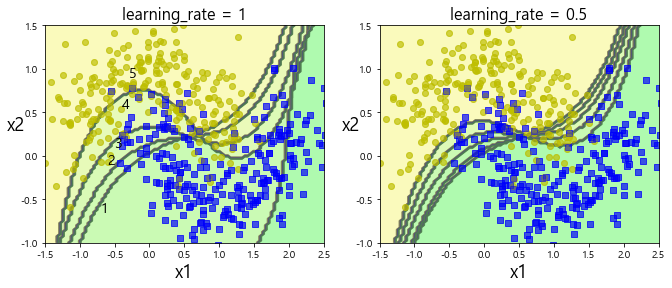

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R',learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
plt.figure(figsize=(11,4))
m = len(X_train)
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    if subplot == 121 :
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)        
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma='auto', random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)

### 👊7.5.2
그래디언트 부스팅 - 전 예측기의 잔여 오차를 이용하여 새로운 예측기를 학습시킨다.  
1. 첫번째 모델을 학습시킨다.  
2. 잔여 오차에 대한 모델을 반복적으로 학습시킨다.  
3. 예측 $\hat{y}\left(x\right)=sum\left(y(x)\right)$

In [14]:
Image(url="img/gradient.png",height=500)

## 👊7.6 스태킹  
스태킹 – 앙상블 학습에서 각 모델의 예측값을 가지고 새로운 메타 모델을 학습시켜 최종 예측 모델을 만드는 방법  
1. 학습 데이터셋에서 샘플링을 통해 서브셋1(subset-1)을 만들고, 이 서브셋을 이용해 각 모델을 학습시킨다. 
2. 서브셋2(subset-2) 학습 시킨 모델을 이용해 각 모델의 예측값을 출력하고 예측값들을 합친다.
3. 합쳐진 예측값들을 입력 특성(input feature)로 사용하는 새로운 모델(meta learner, blender)을 학습시킨다.


In [10]:
Image(url="img/stacking.png")